In [1]:
%cd /mnt/ssd_1/DDOPaI
import random
import numpy as np
import torch
from models.model_base import ModelBase
from models.base.init_utils import weights_init
from utils.data_utils import get_dataloader
from utils.network_utils import get_network
from utils.dict import DictToObj
from pruner.GraSP import GraSP
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot 
import matplotlib.colors as mcolors
mcolors.CSS4_COLORS
from matplotlib.gridspec import GridSpec

/mnt/ssd_1/DDOPaI


In [2]:
config_dict={
    "network": "vgg",
    "depth": 11,
    "dataset": "tiny_imagenet",
    "batch_size": 128,
    "epoch": "300",
    "learning_rate": "0.1",
    "weight_decay": "5e-4",
    "exception": "-1",
    "iterations": 1,
    "normalize": False,
    "target_ratio": 0.99,
    "samples_per_class": 1,
    "num_iters": 10,
    "prune_material":"img",
    "brightness": 255,
    "seed":1,
    "brightness_ablation": 1
  }
classes= {
    'cifar10': 10,
    'cifar100': 100,
    'mnist': 10,
    'tiny_imagenet': 200
}
config=DictToObj(config_dict)
BRIGHTNESS=[255, 50,2,1,0.5,0.2,0.05,0.005,0]
MASKS={}
COLORLIST=['#053061','#1e61a5','#3c8abe','#7bb6d6','#fac8af','#eb9172','#cf5246','#ab162a','#67001f','#007700']
MARKERS=['o','D','X','p','v','s','P','d','^','*','<','>','h','H','8','1','2','3','4','+','x','|','_']
linestyle=['-', '--', '-', '--', '-', '--', '-', '--', '-', '--']
IFCOLOR=True

In [3]:
def setup_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True
setup_seed(config["seed"])

In [4]:
model = get_network(config["network"], config["depth"], config["dataset"], use_bn=config.get('use_bn', True))
ratio = 1 - (1 - config["target_ratio"]) ** (1.0 / config["iterations"])
trainloader, testloader = get_dataloader(config["dataset"], config["batch_size"], 256, 4)
for br in BRIGHTNESS:
    config.brightness=br
    mask = None
    mb = ModelBase(config["network"], config["depth"], config["dataset"],model)
    mb.cuda()

    if mask is not None:
        mb.register_mask(mask)

    mb.model.apply(weights_init)
    masks = GraSP(mb.model, ratio,trainloader, 'cuda',config,num_classes=classes[config["dataset"]],
                            samples_per_class=config["samples_per_class"],
                            num_iters=config.get('num_iters', 1))
    mb.masks=masks
    MASKS[br]=mb.get_ratio_at_each_layer()

Use batch norm is: True


/mnt/ssd_1/DDOPaI/pruner/GraSP.py:79: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  nn.init.xavier_normal(layer.weight)


(1): Iterations 0/10.
(1): Iterations 1/10.
(1): Iterations 2/10.
(1): Iterations 3/10.
(1): Iterations 4/10.
(1): Iterations 5/10.
(1): Iterations 6/10.
(1): Iterations 7/10.
(1): Iterations 8/10.
(1): Iterations 9/10.
(2): Iterations 0/10.
(2): Iterations 1/10.
(2): Iterations 2/10.
(2): Iterations 3/10.
(2): Iterations 4/10.
(2): Iterations 5/10.
(2): Iterations 6/10.
(2): Iterations 7/10.
(2): Iterations 8/10.
(2): Iterations 9/10.
(2): Iterations 10/10.
(2): Iterations 11/10.
(2): Iterations 12/10.
(2): Iterations 13/10.
(2): Iterations 14/10.
(2): Iterations 15/10.
(2): Iterations 16/10.
(2): Iterations 17/10.
(2): Iterations 18/10.
(2): Iterations 19/10.
** norm factor: tensor(1.8590e-07, device='cuda:0')
** accept:  tensor(-1.9831, device='cuda:0')
tensor(93203, device='cuda:0')
(1): Iterations 0/10.
(1): Iterations 1/10.
(1): Iterations 2/10.
(1): Iterations 3/10.
(1): Iterations 4/10.
(1): Iterations 5/10.
(1): Iterations 6/10.
(1): Iterations 7/10.
(1): Iterations 8/10.
(1):

In [5]:
for k,v in MASKS.items():
  MASKS[k]=np.array(list(v.values())[:-1])
print(MASKS)

{255: array([32.8125    , 10.12641042,  3.99915911,  1.88208688,  1.17221409,
        0.30356513,  0.62204995,  0.44568381, 15.71679711]), 50: array([33.96990895, 11.5817599 ,  4.41080742,  1.80697981,  1.04683768,
        0.29055278,  0.60077244,  0.45348275, 15.95117152]), 2: array([33.73842537, 12.7332896 ,  4.93130162,  2.19726562,  0.92264814,
        0.25359259,  0.48111812,  0.44220821, 16.67773426]), 1: array([34.2592597 , 12.50406951,  5.37516288,  2.38935687,  1.01877851,
        0.26389228,  0.41397945,  0.3850301 , 15.96874893]), 0.5: array([35.35879552, 12.29383722,  5.03980853,  2.25762259,  0.98258127,
        0.26058622,  0.46111215,  0.42402479, 16.33495986]), 0.2: array([36.22685075, 13.57557476,  5.56674525,  2.49023438,  0.97334124,
        0.24880304,  0.40639243,  0.34929912, 15.90038985]), 0.05: array([34.0277791 , 12.62749583,  6.96139857,  3.59853096,  1.40626701,
        0.2655877 ,  0.25639005,  0.14415317,  9.02832001]), 0.005: array([31.65509403, 11.2548828

/tmp/ipykernel_3651864/1638003108.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
/tmp/ipykernel_3651864/1638003108.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


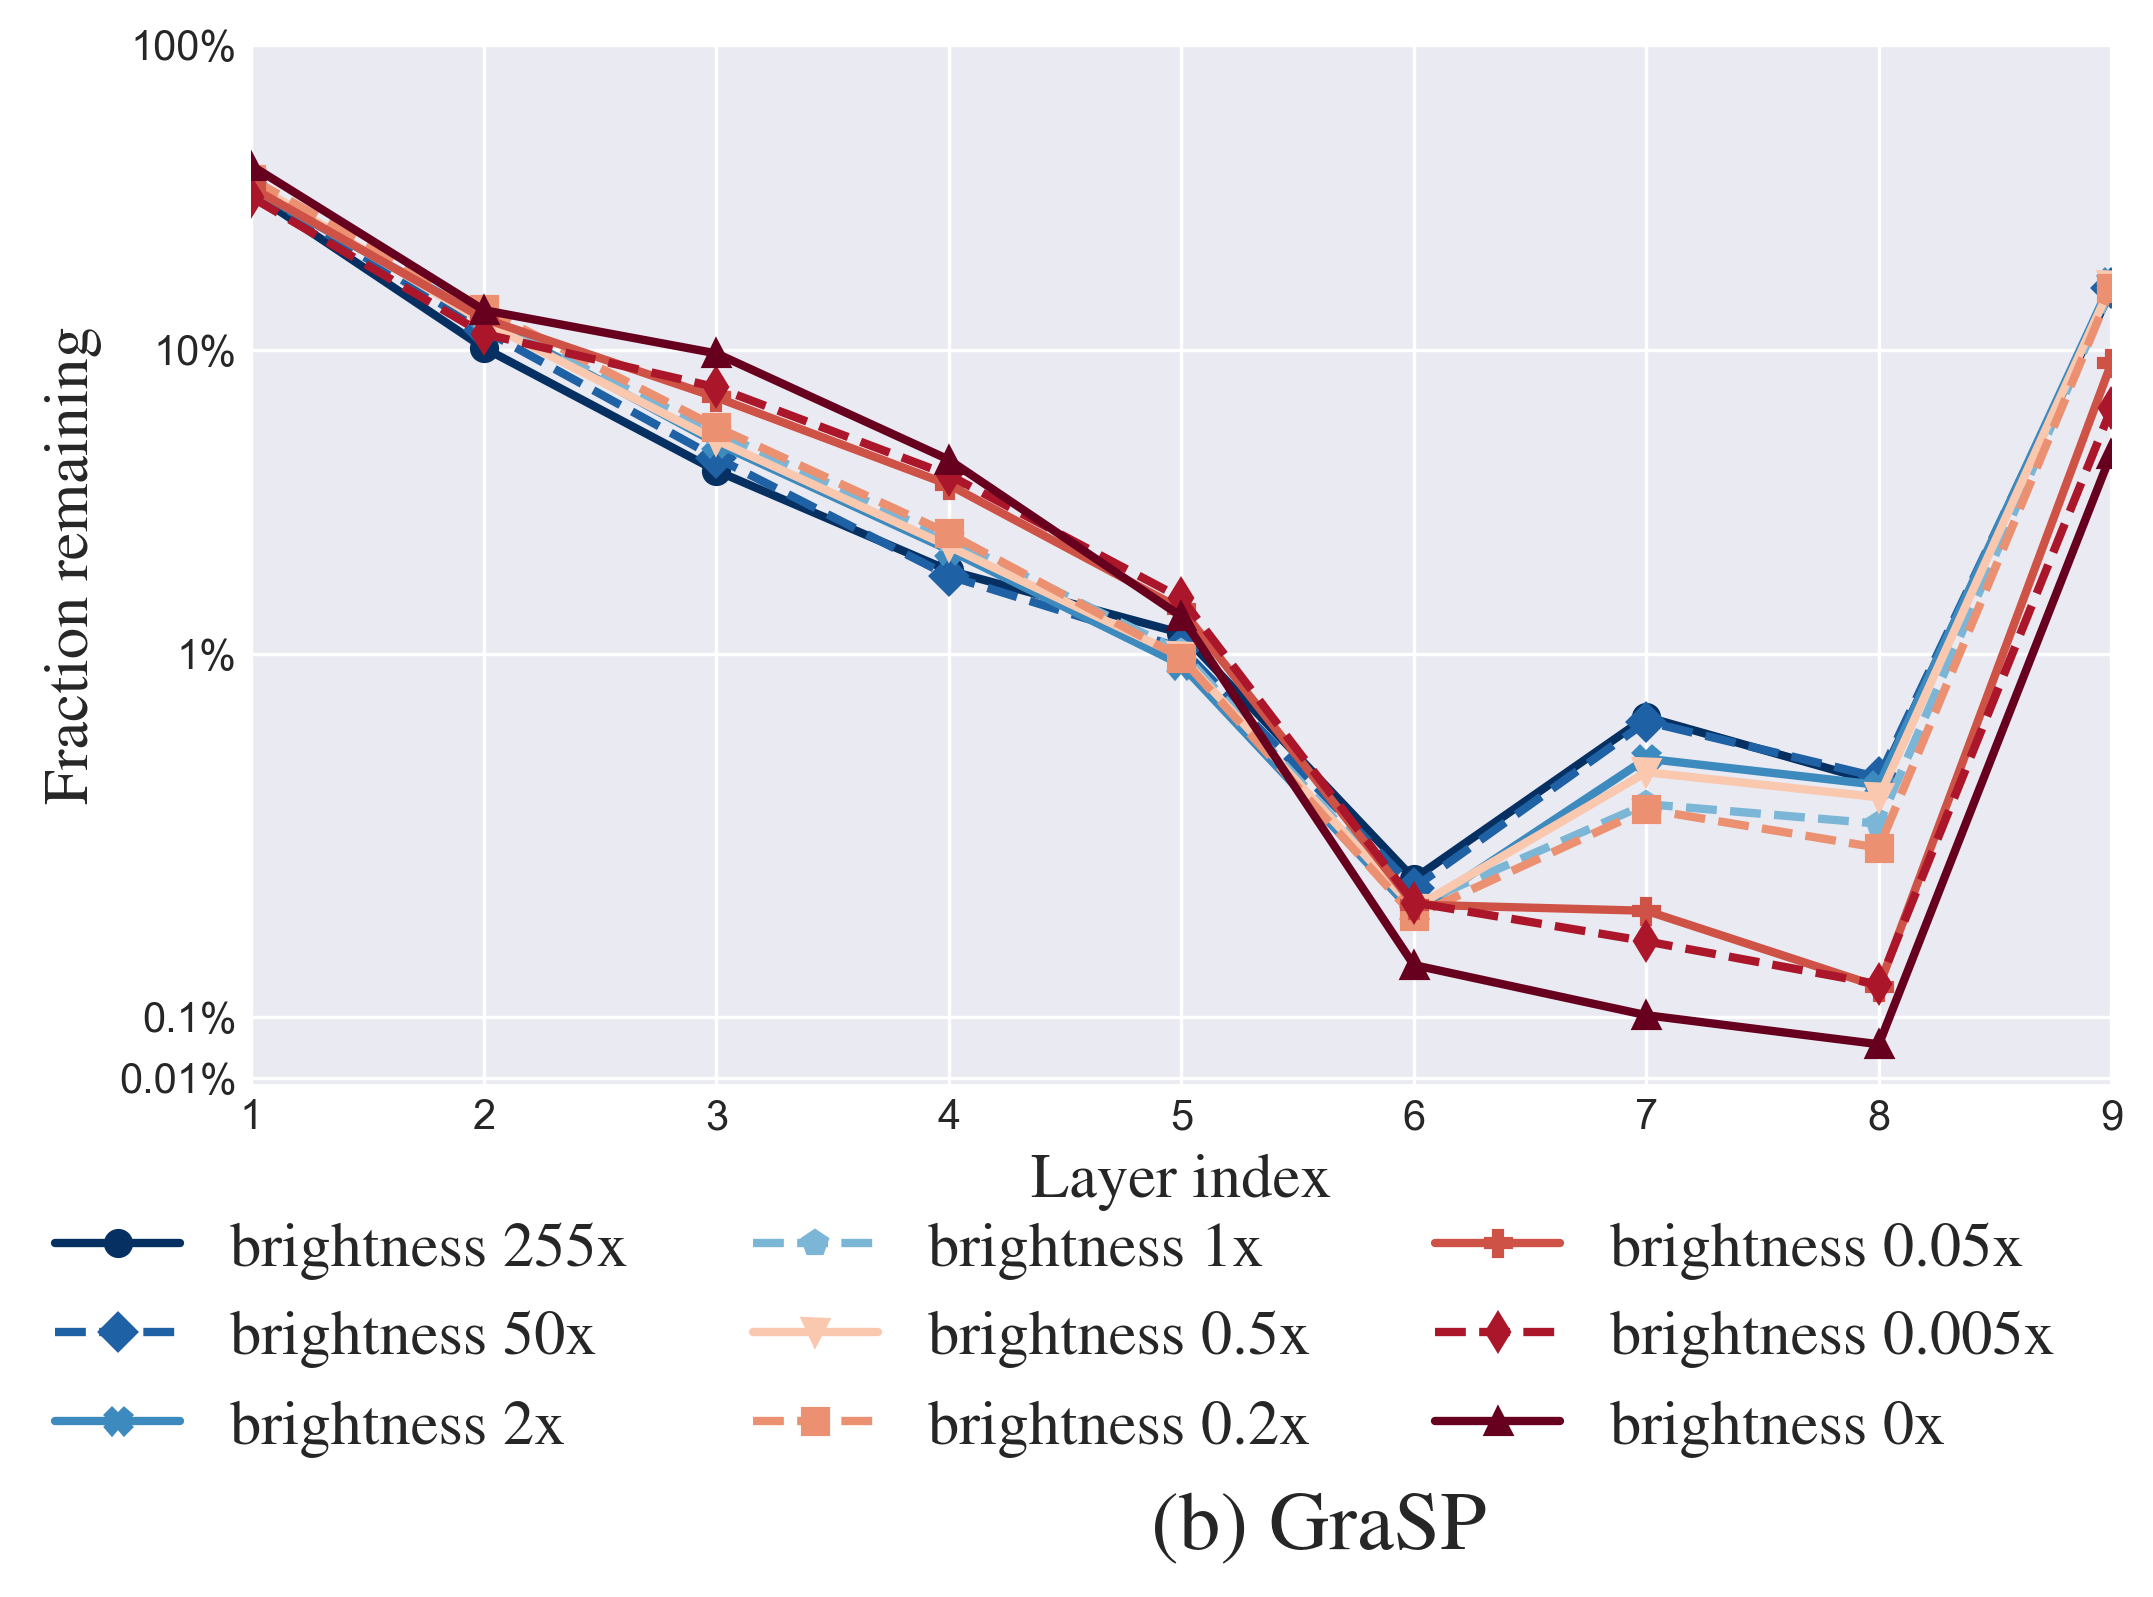

In [6]:
ratiolist=MASKS

font1 = {
    'weight' : 'normal',
    'size'   : 15,
     "family":'Nimbus Roman'
    }


iters=list(range(ratiolist[BRIGHTNESS[0]].shape[0]))
fig=plt.figure(figsize=(8,4.5),dpi=300)
#plt.style.use('seaborn-white')
plt.style.use('seaborn-darkgrid')
grid = GridSpec(1, 4, wspace=0.5)

# set ax2 properties
ax2=plt.subplot(grid[0, 0:])
my_x_ticks = np.arange(0, 18, 1)
ax2.set_xticks(my_x_ticks)
ax2.set_yscale('symlog', linthresh=0.5)

ax2.set_xlim(1,9)
ax2.set_ylim(0,100)

ax2.set_xlabel('Layer index',font1)

ax2.set_xlabel('Layer index',font1)
ax2.set_ylabel('Fraction remaining',font1)

values = np.array([0.01,0.1,1,10,100])
ax2.set_yticks( values, ['0.01%','0.1%','1%','10%','100%'] )


for i,value in enumerate(BRIGHTNESS):
    
    label='brightness %sx' % (str(value))
    ax2.plot([i + 1 for i in iters], ratiolist[value], 
                    color=COLORLIST[i],
                    label=label,linewidth=2.0
                    ,zorder=1,marker=MARKERS[i],linestyle=linestyle[i])

     
fig.text(0.5, -0.22, '(b) GraSP',fontsize=font1['size']+5,font='Nimbus Roman', va='center')
fig.legend(prop=font1,bbox_to_anchor=(0.9, 0.05),ncol=3)
plt.tight_layout() 